# Install Packages and Libraries

In [1]:
# Install packages
%pip install -U ipykernel matplotlib pandas

# Import libraries
from matplotlib import pyplot as plt
from pandas import read_csv
from random import choice, randint
from kMeans import kMeans # Import the kMeans model

Note: you may need to restart the kernel to use updated packages.


# Load and Clean the Data

In [2]:
df = read_csv("iris.csv")
df.drop(columns=["species"], inplace=True)
matrix = (df.to_numpy().tolist())

def Copy(matrix: list[list[float]]) -> list[list[float]]:
    """
    Create a new and unique (in memory) copy of the given matrix.

    Parameters
    ----------
    matrix : list[list[float]]
        The matrix to be copied.

    Returns
    -------
    list[list[float]]
        The copy
    """
    
    return [vector.copy() for vector in matrix]

# Train Models

In [5]:
# Initialize the models
groups = 3
models = [
    kMeans(
        trainingMatrix=Copy(matrix),
        kGroups=groups,
        strategy="euclidean"
    ),
    kMeans(
        trainingMatrix=Copy(matrix),
        kGroups=groups,
        strategy="euclidean"
    )
]

# Train the models
epochs = [
    models[0].Train(),
    models[1].Train(True)
]

# Graph Clusters

*Colors are assigned randomly*

euclidean clustering epochs: 10
50 : [5.006, 3.418, 1.464, 0.244]
39 : [6.8538, 3.0769, 5.7154, 2.0538]
61 : [5.8836, 2.741, 4.3885, 1.4344]
euclidean clustering epochs: 80
58 : [6.0, 2.9, 4.5, 1.5]
50 : [5.0, 3.4, 1.5, 0.2]
42 : [6.5, 3.0, 5.5, 1.8]


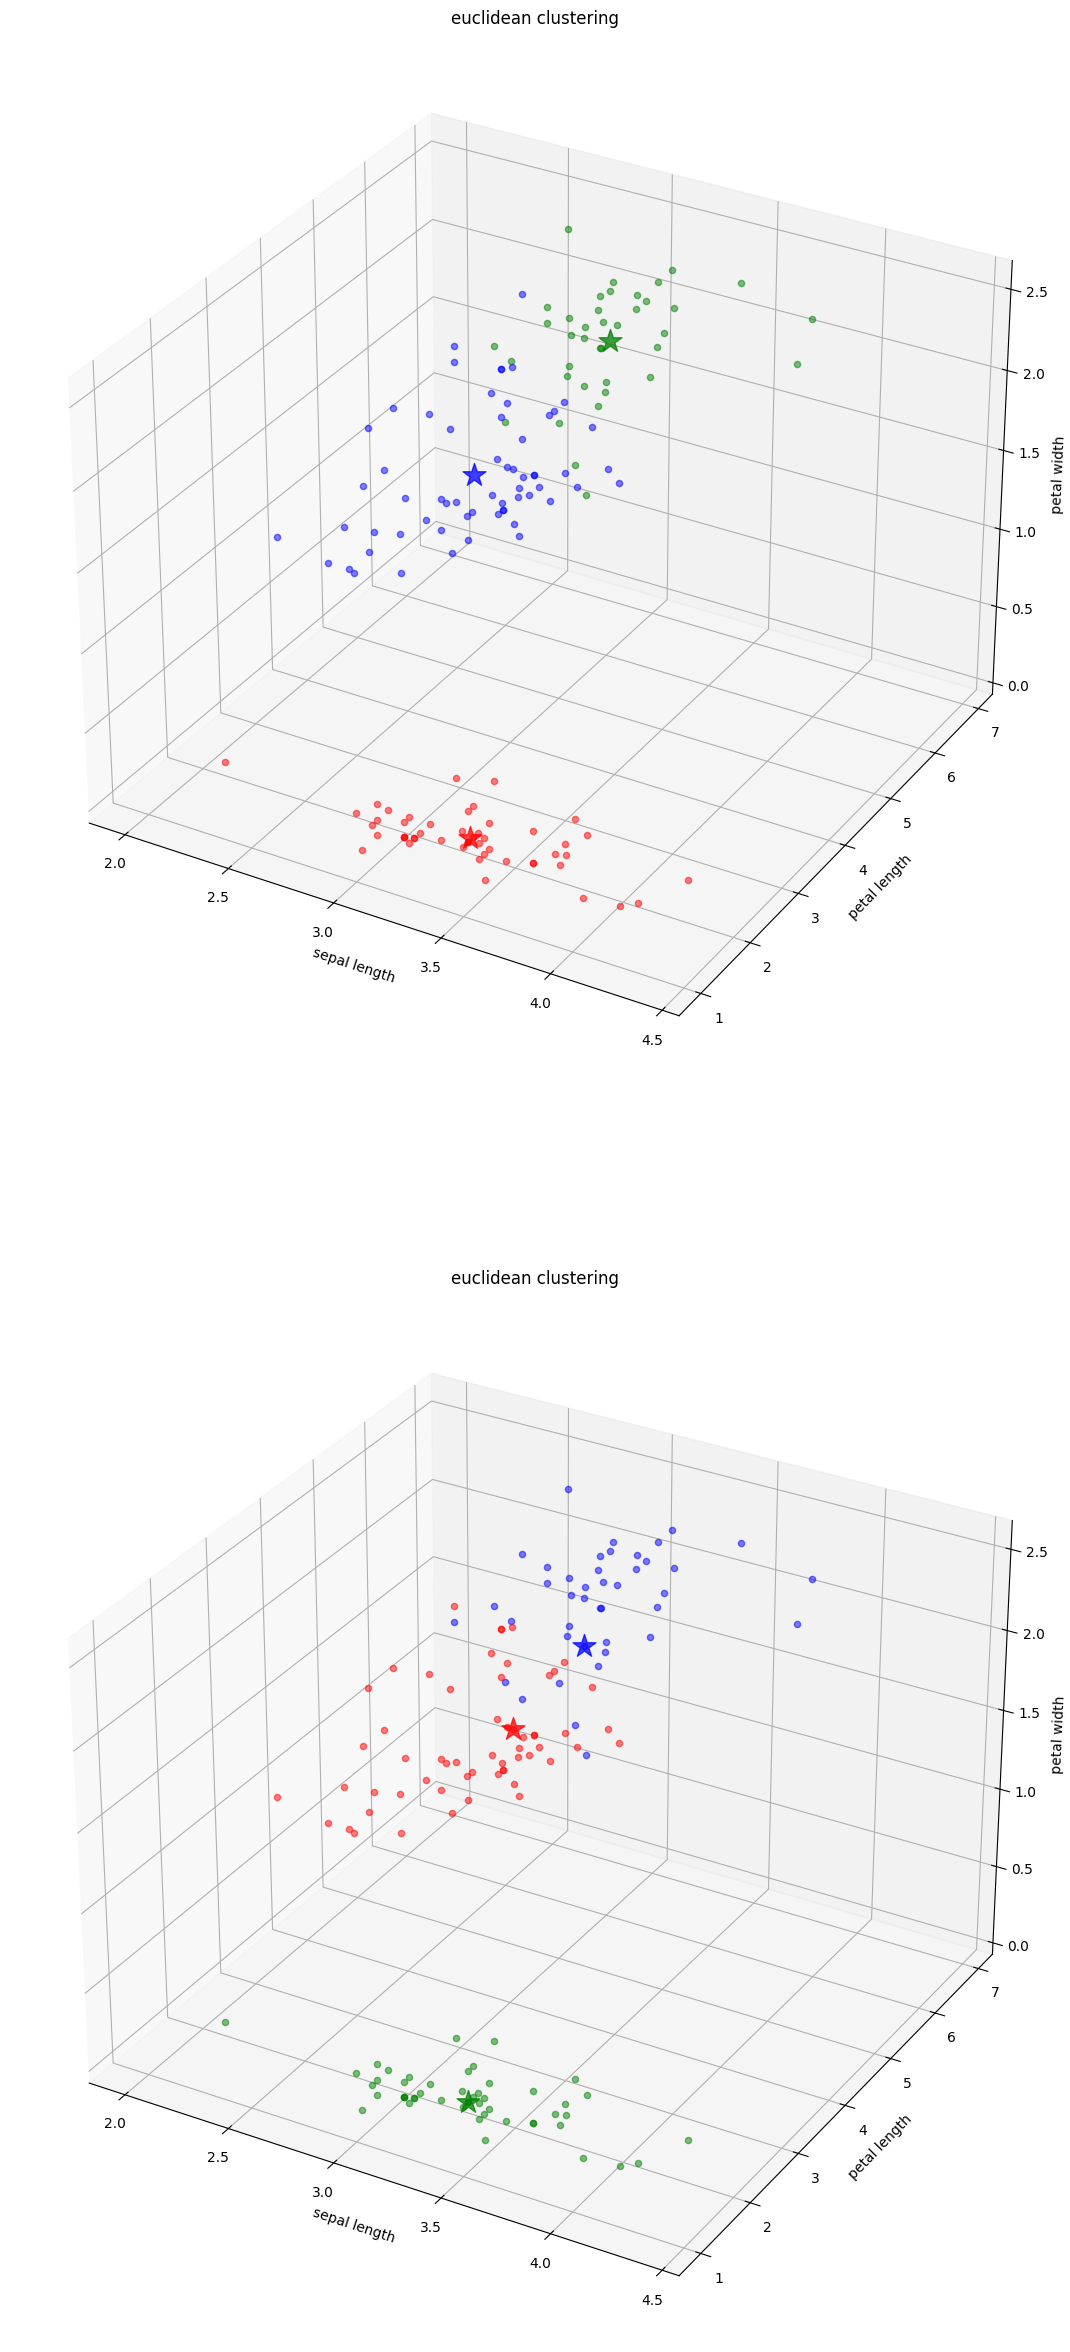

In [6]:
def Draw_Clusters(model: kMeans, axis: plt.Axes, epoch: int) -> None:
    print(f"{model.strategy} clustering epochs: {epoch}")

    axis.set_title(f"{model.strategy} clustering")
    axis.set_xlabel('sepal length')
    axis.set_ylabel('petal length')
    axis.set_zlabel('petal width')

    for cIndex, cluster in enumerate(model.clusters):
        print(f"{len(cluster.vectors)} : {cluster.centroid}")
        clusterColor: str = colors[cIndex]
        # Plot Vectors
        for vector in cluster.vectors:
            axis.scatter(vector[1], vector[2], vector[3], color=clusterColor, alpha=0.5)
        # Plot Centroid
        axis.scatter(cluster.centroid[1], cluster.centroid[2], cluster.centroid[3], color=clusterColor, marker='*', alpha=.75, s=300)

colors = ['red', 'green', 'blue']

# Prepare for visualization
figure = plt.figure(figsize=(20, 30))
grid = figure.add_gridspec(len(models), 1)
axises = grid.subplots(subplot_kw={"projection": "3d"})

# Draw clusters
for axis, model, epoch in zip(axises, models, epochs):
    Draw_Clusters(model, axis, epoch)

plt.show()